# COVID-19 Italian Data Preliminary Analysis  

In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
import seaborn as sns; sns.set(rc={'figure.figsize':(15, 12)})

In [2]:
data_dir = Path(".") / "data" 
national = data_dir / "dati-andamento-nazionale" / "dpc-covid19-ita-andamento-nazionale.csv"
df = pd.read_csv(national, index_col=0,parse_dates=[0])

In [3]:
df.tail()

,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_attualmente_positivi,nuovi_attualmente_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,note_it,note_en
data,,,,,,,,,,,,,
2020-03-25 17:00:00,ITA,23112,3489,26601,30920,57521,3491,9362,7503,74386,324445,NaN,NaN
2020-03-26 17:00:00,ITA,24753,3612,28365,33648,62013,4492,10361,8165,80539,361060,pd-IT-0007,pd-EN-0007
2020-03-27 17:00:00,ITA,26029,3732,29761,36653,66414,4401,10950,9134,86498,394079,NaN,NaN
2020-03-28 17:00:00,ITA,26676,3856,30532,39533,70065,3651,12384,10023,92472,429526,NaN,NaN
2020-03-29 17:00:00,ITA,27386,3906,31292,42588,73880,3815,13030,10779,97689,454030,pd-IT-0009,pd-EN-0009


In [4]:
df = df.drop(columns=["stato", "note_it", "note_en"])
df.index.name='date'
df.index = df.index.to_period(freq='D')

In [5]:
df.tail()

,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_attualmente_positivi,nuovi_attualmente_positivi,dimessi_guariti,deceduti,totale_casi,tamponi
date,,,,,,,,,,
2020-03-25,23112,3489,26601,30920,57521,3491,9362,7503,74386,324445
2020-03-26,24753,3612,28365,33648,62013,4492,10361,8165,80539,361060
2020-03-27,26029,3732,29761,36653,66414,4401,10950,9134,86498,394079
2020-03-28,26676,3856,30532,39533,70065,3651,12384,10023,92472,429526
2020-03-29,27386,3906,31292,42588,73880,3815,13030,10779,97689,454030


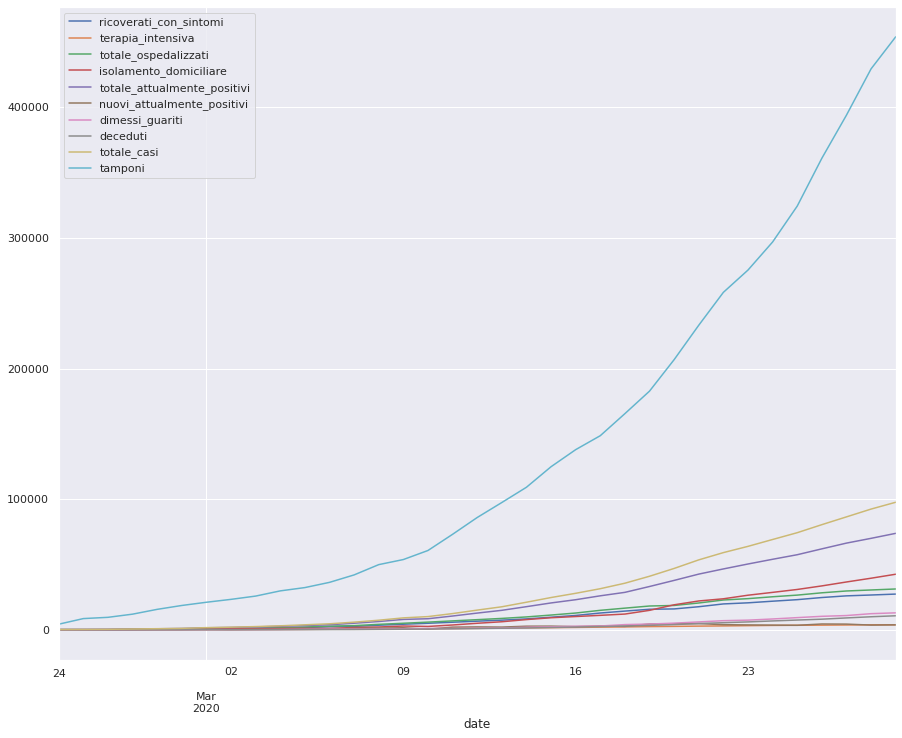

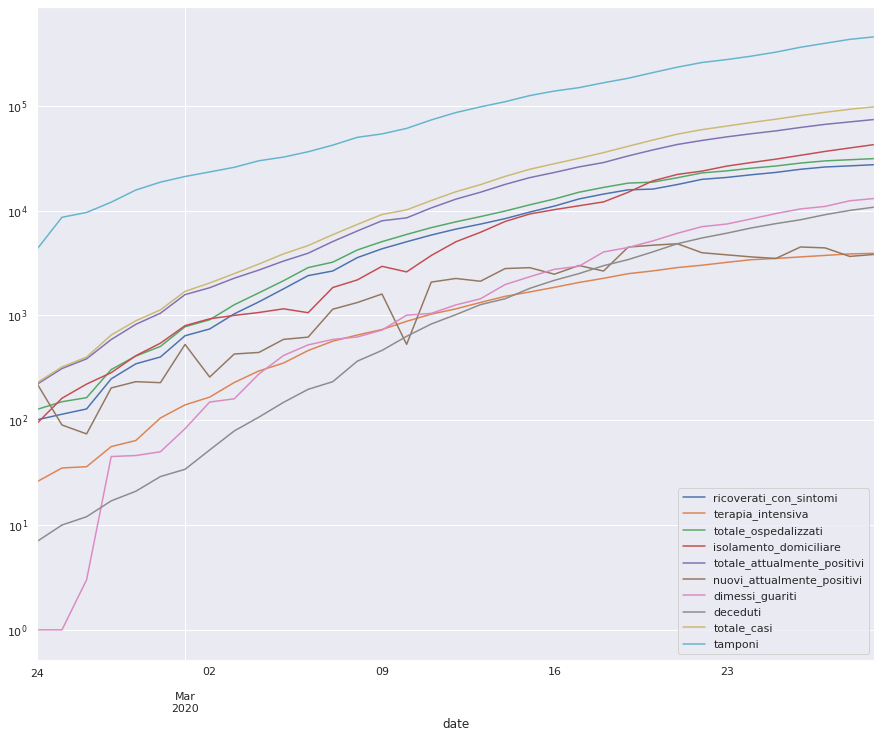

In [6]:
df.plot()
df.plot(logy=True);

In [7]:
deltadf = df.diff().dropna().astype(np.int)
percdf = df.pct_change().dropna()

In [8]:
deltadf.tail()

,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_attualmente_positivi,nuovi_attualmente_positivi,dimessi_guariti,deceduti,totale_casi,tamponi
date,,,,,,,,,,
2020-03-25,1175,93,1268,2223,3491,-121,1036,683,5210,27481
2020-03-26,1641,123,1764,2728,4492,1001,999,662,6153,36615
2020-03-27,1276,120,1396,3005,4401,-91,589,969,5959,33019
2020-03-28,647,124,771,2880,3651,-750,1434,889,5974,35447
2020-03-29,710,50,760,3055,3815,164,646,756,5217,24504


In [9]:
percdf.tail()

,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_attualmente_positivi,nuovi_attualmente_positivi,dimessi_guariti,deceduti,totale_casi,tamponi
date,,,,,,,,,,
2020-03-25,0.053562,0.027385,0.050053,0.077465,0.064612,-0.033499,0.124429,0.100147,0.075315,0.092540
2020-03-26,0.071002,0.035254,0.066313,0.088228,0.078093,0.286737,0.106708,0.088231,0.082717,0.112854
2020-03-27,0.051549,0.033223,0.049216,0.089307,0.070969,-0.020258,0.056848,0.118677,0.073989,0.091450
2020-03-28,0.024857,0.033226,0.025906,0.078575,0.054973,-0.170416,0.130959,0.097329,0.069065,0.089949
2020-03-29,0.026616,0.012967,0.024892,0.077277,0.054449,0.044919,0.052164,0.075427,0.056417,0.057049


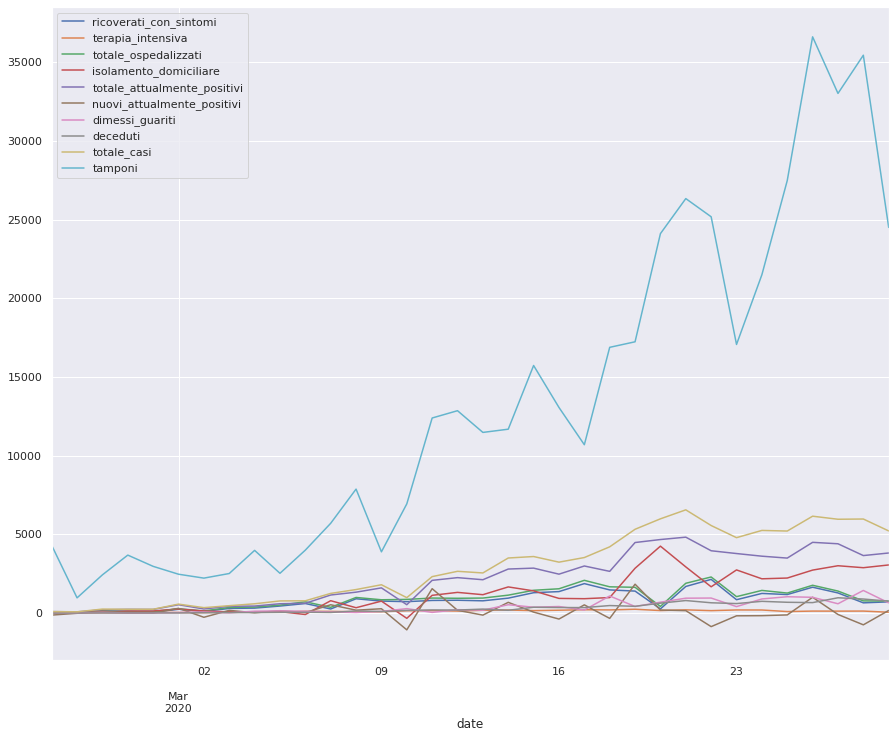

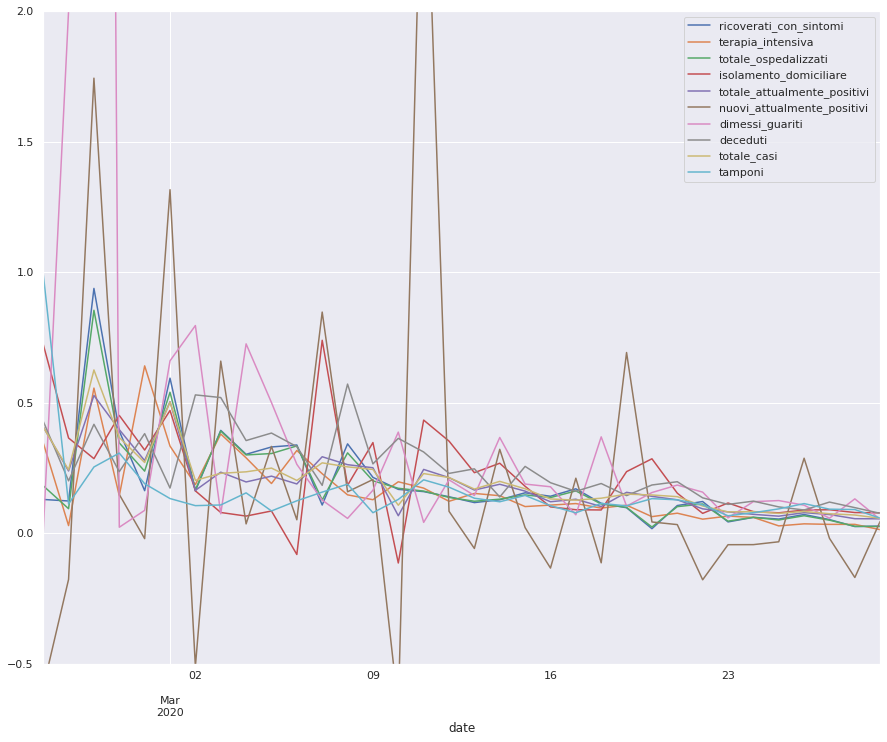

In [10]:
deltadf.plot()
percdf.plot(ylim=(-0.5, 2));

In [11]:
growthdf = pd.DataFrame({'total': df.totale_casi, 'diff1': df.totale_casi.diff(), 'diff2':df.totale_casi.diff().diff()})

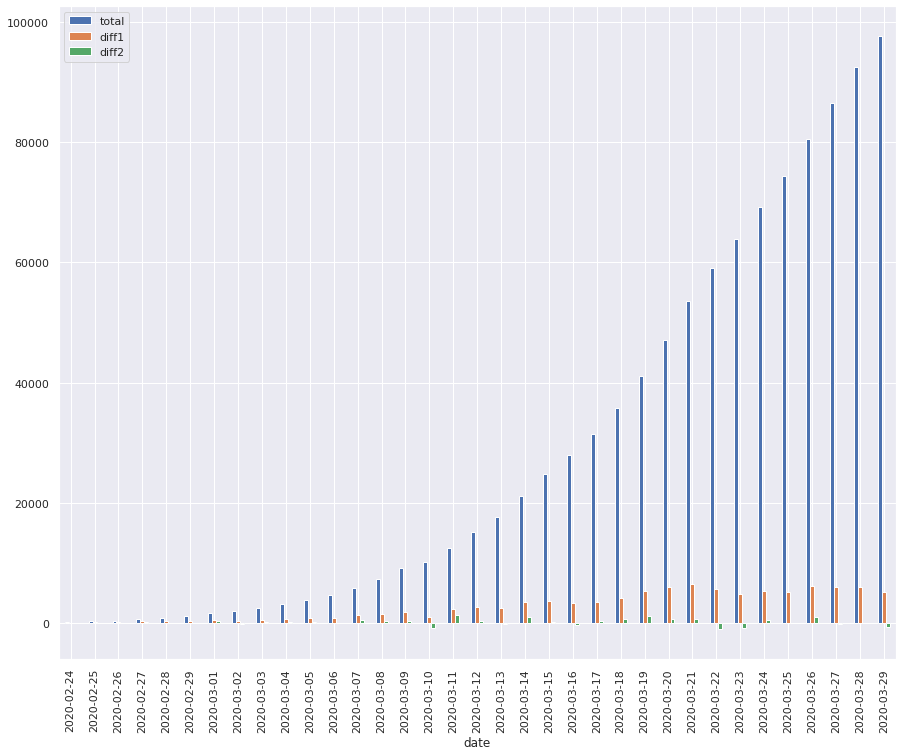

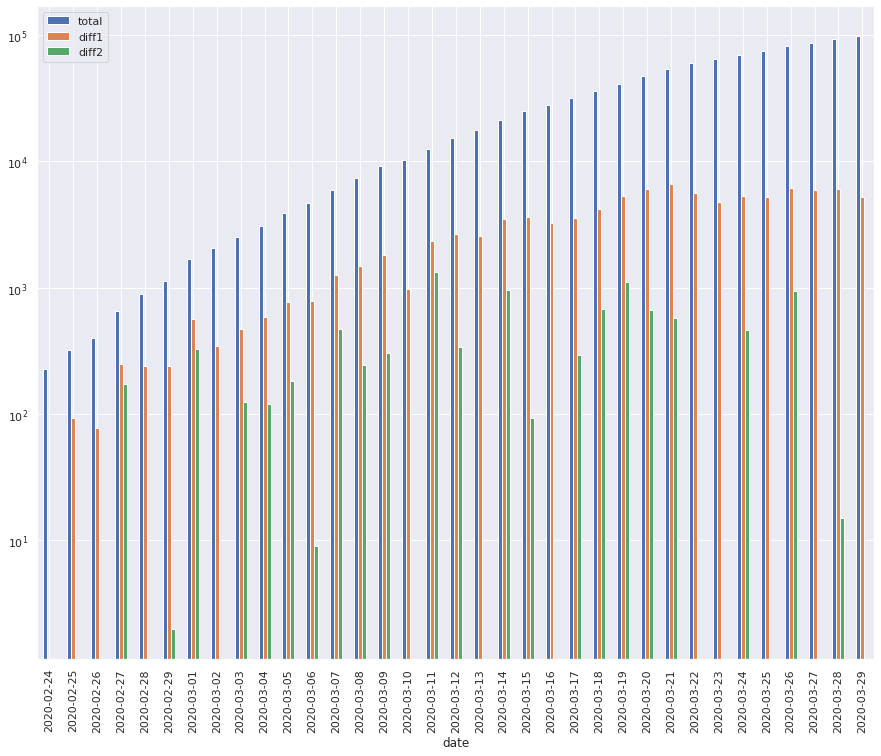

In [12]:
growthdf.plot(kind='bar')
growthdf.plot(kind='bar', logy=True);